In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
matplotlib.style.use('ggplot')

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
df1=pd.read_csv(r'C:\Users\HP\Desktop\Titanic\train.csv','r',encoding='utf8',delimiter=',')
train=df1

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# The missing values in training dataset are Age,Cabin,Embarked

In [8]:
df2=pd.read_csv(r'C:\Users\HP\Desktop\Titanic\test.csv','r',encoding='utf8',delimiter=',')
df2.head()
test=df2
df2.head()
ID=df2["PassengerId"]

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# The missing values in testing dataset are Age,Cabin,Fare

In [13]:
full_dataset=[train,test]

In [14]:
print ("The data distribution in training set is :" )
train['Embarked'].value_counts()

The data distribution in training set is :


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
print ("The data distribution in test set is :" )
test['Embarked'].value_counts()

The data distribution in test set is :


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
# As Embarked has a mode of 'S' ,so we replace the missing values with 'S' in both training and testing sets
for data in full_dataset:
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

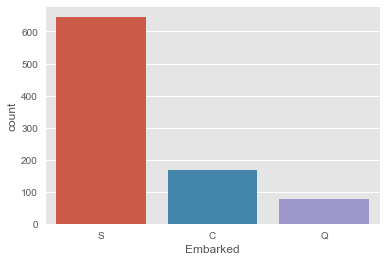

In [17]:
sns.countplot(x="Embarked", data=train)

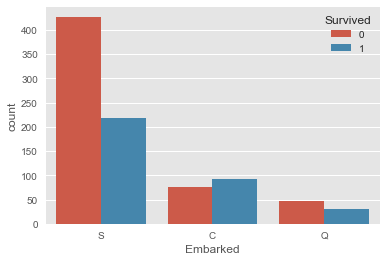

In [18]:
sns.countplot(x="Embarked", hue='Survived',data=train)

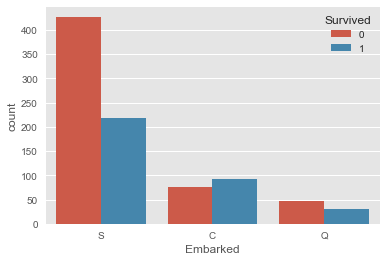

In [19]:
sns.countplot(x="Embarked", hue='Survived',data=train)

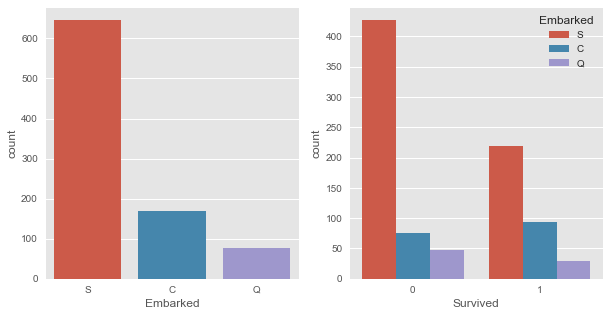

In [20]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='Embarked', data = train, ax = axis1)
sns.countplot(x='Survived', hue = "Embarked", data = train, ax= axis2)


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


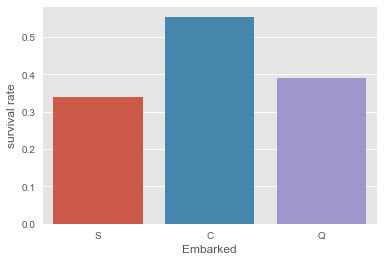

In [21]:
embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'], as_index = False).mean()
sns.barplot(x='Embarked', y = 'Survived', data= embark_perc, order = ['S','C','Q']).set(ylabel='survival rate')

print(embark_perc) 
# People that departed from Cherbourg had a 20% higher survival rate than the other 2 locations

In [22]:
train[['Fare','Pclass']].corr()
# The correlation is strong between Pclass and Fare. Also the Fare descreases as one moves from Pclass 1 to Pclass 3 .
# Since we have a negative correlation between these two variables.


,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


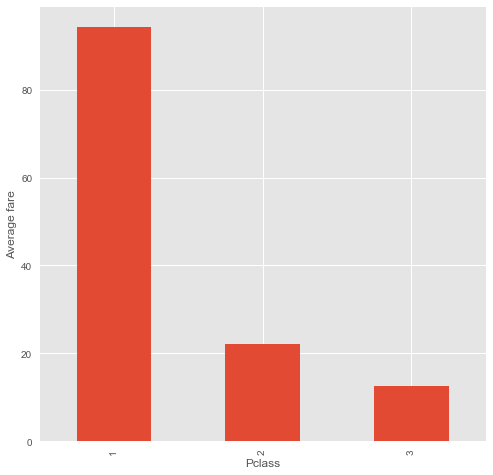

In [23]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(8,8), ax = ax)

In [24]:
train[['Fare','Pclass']].groupby('Pclass',as_index=False).median()

,Pclass,Fare
0,1,60.2875
1,2,14.2500
2,3,8.0500


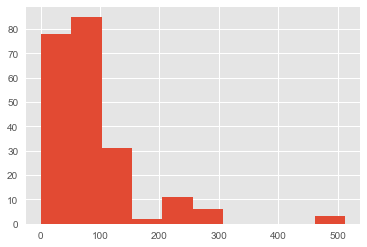

In [25]:
train[train['Pclass']==1]['Fare'].hist()

In [26]:
test['Fare'].fillna(-9999,inplace=True)

Fares=dict()
for a_class in train['Pclass'].unique():
    Fares[a_class]=train[(train['Pclass']==a_class) & (train['Fare']!=-9999) ]['Fare'].median()
    
print(Fares)    
    

{3: 8.05, 1: 60.287499999999994, 2: 14.25}


In [27]:
test[test['Fare']==-9999]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,-9999.0,NaN,S


In [28]:
#for index,row in test.iterrows():
for row in test.itertuples():
    if row.Fare==-9999 :
        test.loc[row[0],'Fare']=Fares[row.Pclass]
test[test['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


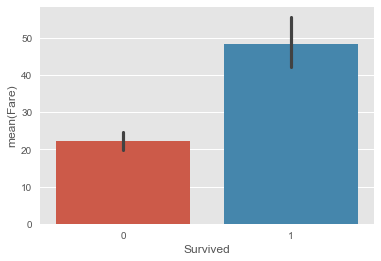

In [29]:
#sns.countplot(x="Fare", hue='Survived', data=train)
#sns.stripplot(x="Survived", y="Fare", data=train,jitter=True);
#sns.swarmplot(x="Survived", y="Fare", data=train);

sns.barplot(x="Survived", y="Fare",data=train);
# The people who paid more ticket price have better chances of surviving . 


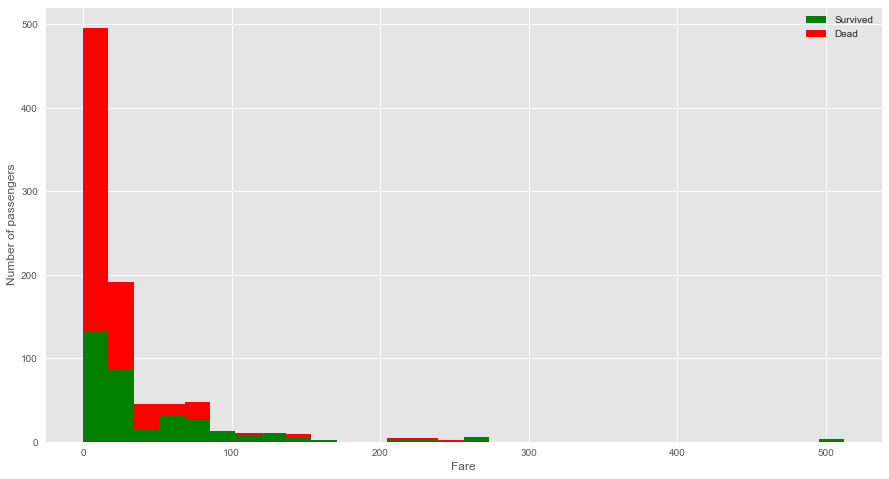

In [30]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

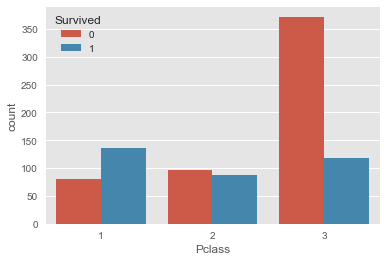

In [31]:
sns.countplot(x="Pclass", hue='Survived', data=train)

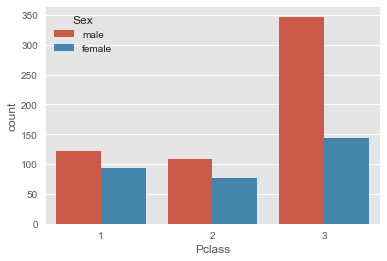

In [32]:
sns.countplot(x="Pclass", hue='Sex', data=train)

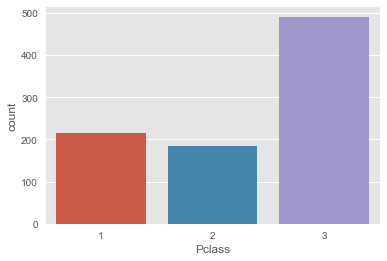

In [33]:
sns.countplot(x="Pclass", data=train)

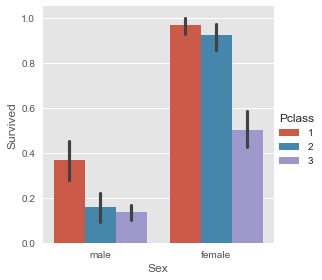

In [34]:
sns.factorplot(x="Sex", y="Survived", hue="Pclass", data=train,kind='bar');

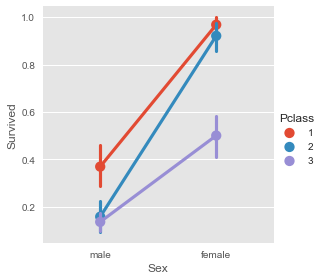

In [35]:
sns.factorplot(x="Sex", y="Survived", hue="Pclass", data=train);

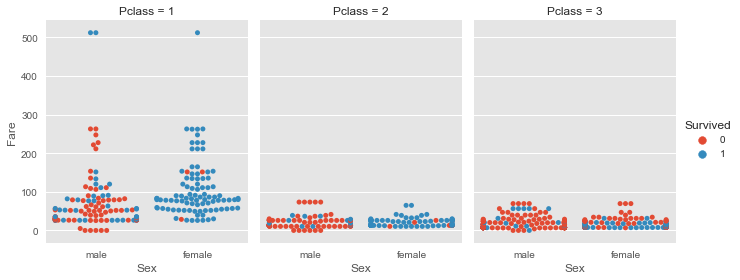

In [36]:
sns.factorplot(x="Sex", y="Fare", hue="Survived",
               col="Pclass", data=train, kind="swarm",size=4,aspect=.8);

In [37]:
import re as re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [38]:
'''for dataset in full_dataset:
    for row in dataset.itertuples():
        if row.Age < 18:
            dataset.loc(row[0],'Title') = 'Master'''''



"for dataset in full_dataset:\n    for row in dataset.itertuples():\n        if row.Age < 18:\n            dataset.loc(row[0],'Title') = 'Master"

In [39]:
print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


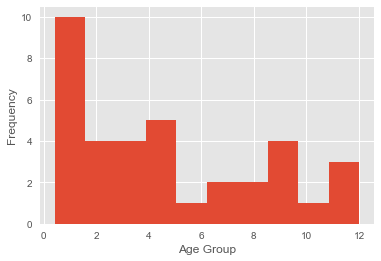

In [40]:
ax=train[train['Title']=='Master']['Age'].plot(kind='hist')
ax.set_xlabel('Age Group')


In [41]:
for dataset in full_dataset:
    dataset['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

    
train[['Title','Age']].groupby('Title').mean()

,Age
Title,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [42]:
# Imputing Null Values for Age

for dataset in full_dataset:
    dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Mr'),'Age']= 33
    dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Mrs'),'Age']=36
    dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Master'),'Age']=5
    dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Miss'),'Age']=22
    dataset.loc[(dataset.Age.isnull())&(dataset.Title=='Other'),'Age']=46
    
    
  

In [43]:
def child_status(passenger):
    age, sex,title = passenger
    if age< 18:
        if age <2: 
            return 'Baby'
        else:
            return 'Child'
    else:
        return title
    
for dataset in full_dataset:
        dataset['Title'] = dataset[['Age', 'Sex','Title']].apply(child_status, axis=1)
    


In [44]:
test[['Title','Age']].groupby('Title').mean()

test.loc[test['Title']=='Dona','Title']='Other'




In [45]:
train[['Title','Survived']].groupby('Title').mean()

,Survived
Title,
Baby,0.857143
Child,0.495146
Miss,0.718519
Mr,0.165680
Mrs,0.788618
Other,0.111111


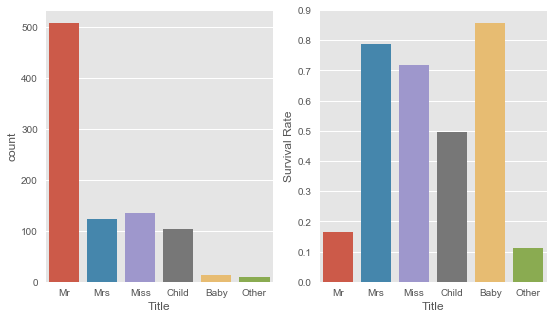

In [46]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(9,5))
sns.countplot(x='Title', data=train, ax=axis1)
person_perc = train[["Title", "Survived"]].groupby(['Title'], as_index = False).mean()
sns.barplot(x = 'Title', y = 'Survived', 
            data=person_perc, ax=axis2, order=['Mr','Mrs','Miss','Child','Baby','Other']).set(ylabel='Survival Rate')

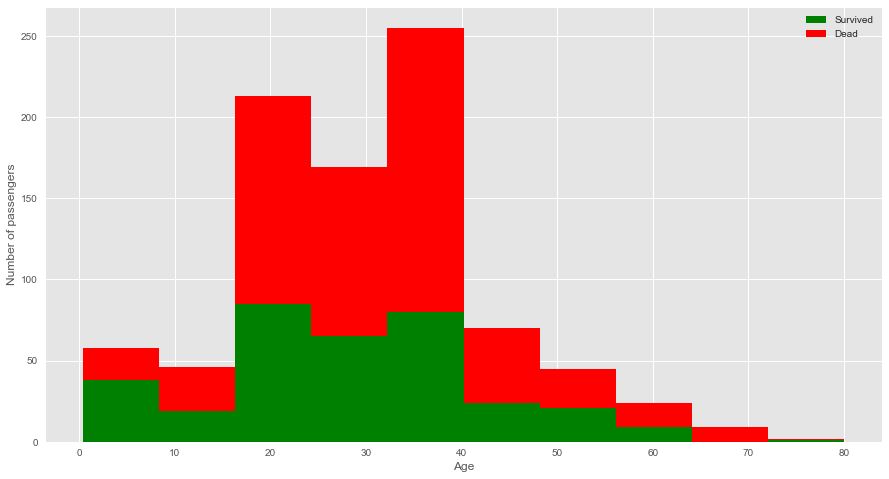

In [47]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

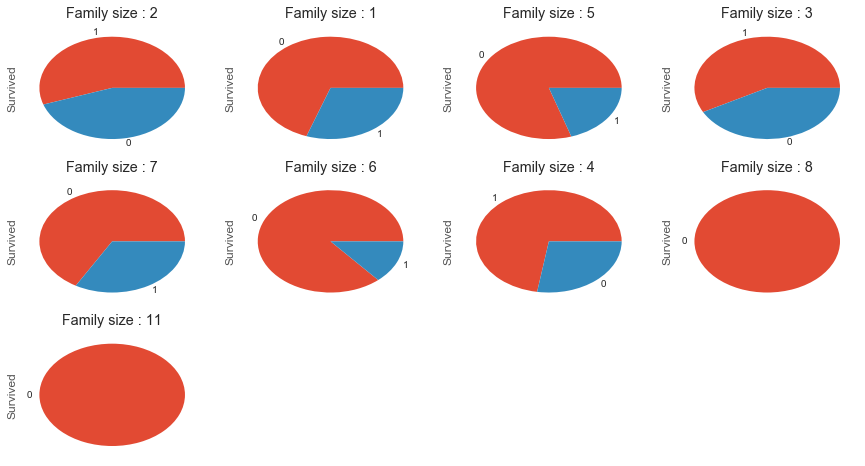

In [48]:
for dataset in full_dataset:
    dataset['Family Size']= dataset['SibSp'] + dataset['Parch'] + 1 
    
fig = plt.figure(figsize=(15,8))
i = 0
for size in train['Family Size'].unique():
    fig.add_subplot(3, 4, i+1)
    plt.title('Family size : {}'.format(size))
    train['Survived'][train['Family Size'] == size].value_counts().plot(kind='pie')
    i += 1

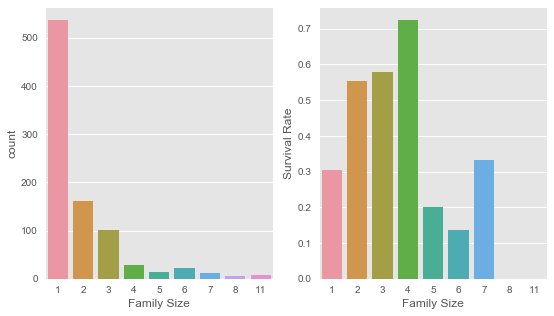

In [49]:
fig, (axis1, axis2) = plt.subplots(1,2,sharex = True, figsize=(9,5))
sns.countplot(x='Family Size', data=train,  ax= axis1).set(xlabel = 'Family Size')

#ratio of survivors 
family_perc = train[['Family Size', 'Survived']].groupby(['Family Size'], as_index=False).mean()
sns.barplot(x='Family Size', y='Survived', data=family_perc,  ax= axis2).set(xlabel= 'Family Size', ylabel='Survival Rate')



In [50]:
# introducing other features based on the family size

def Family_Type(size):
    if size==1:
        return 'Single'
    elif (size>=2) and (size <=4):
        return 'Small'
    else:
        return 'Large'


for dataset in full_dataset:
    dataset[ 'Family Type' ]  = dataset[ 'Family Size' ].apply( Family_Type)
    
train['Family Type'].value_counts()

Single    537
Small     292
Large      62
Name: Family Type, dtype: int64

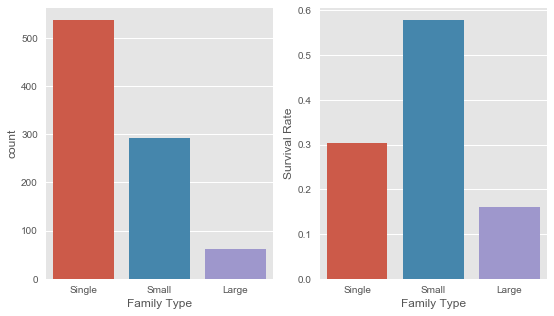

In [51]:
fig, (axis1, axis2) = plt.subplots(1,2,sharex = True, figsize=(9,5))
sns.countplot(x='Family Type', data=train,  ax= axis1,order=['Single','Small','Large']).set(xlabel = 'Family Type')

#ratio of survivors 
family_perc = train[['Family Type', 'Survived']].groupby(['Family Type'], as_index=False).mean()
sns.barplot(x='Family Type', y='Survived', data=family_perc,  ax= axis2,order=['Single','Small','Large']).set(xlabel= 'Family Type', ylabel='Survival Rate')



In [52]:
To_drop=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Family Size']
for dataset in full_dataset:
    for col in To_drop:
        dataset.drop(col, axis=1, inplace=True)
        
Y=train['Survived']  
del train['Survived'] 

        

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
Family Type    891 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 48.8+ KB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
Family Type    418 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 22.9+ KB


In [55]:
Cat_Var=['Pclass','Embarked','Title','Family Type']
Cont_Var=['Age','Fare']

print(train[Cont_Var].head())

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [56]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

le = preprocessing.LabelEncoder()
OHE=OneHotEncoder()

#Transforming Sex in Train Dataset
col_trans=le.fit_transform(train['Sex'])
print(len(col_trans))

print(le.classes_)
print()

col_trans=OHE.fit_transform(col_trans.reshape(-1, 1))

df_Dummy1=pd.DataFrame(col_trans.toarray().astype(int), columns=le.classes_)
print(df_Dummy1.head(10))


891
['female' 'male']

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
5       0     1
6       0     1
7       0     1
8       1     0
9       1     0


In [57]:
#Transforming Sex in Test Dataset
col_trans=le.transform(test['Sex'])
print(len(col_trans))

print(le.classes_)
print()

col_trans=OHE.transform(col_trans.reshape(-1, 1))

df_Dummy2=pd.DataFrame(col_trans.toarray().astype(int), columns=le.classes_)
print(df_Dummy2.head(10))

418
['female' 'male']

   female  male
0       0     1
1       1     0
2       0     1
3       0     1
4       1     0
5       0     1
6       1     0
7       0     1
8       1     0
9       0     1


In [58]:
# Concatenate the newly formed columns female and male to Train and Test datasets.

train=pd.concat([train,df_Dummy1],axis=1)
test=pd.concat([test,df_Dummy2],axis=1)


train.drop('Sex',axis=1,inplace=True)
test.drop('Sex',axis=1,inplace=True)

print(train.head())
print()
print(test.head())

   Pclass   Age     Fare Embarked Title Family Type  female  male
0       3  22.0   7.2500        S    Mr       Small       0     1
1       1  38.0  71.2833        C   Mrs       Small       1     0
2       3  26.0   7.9250        S  Miss      Single       1     0
3       1  35.0  53.1000        S   Mrs       Small       1     0
4       3  35.0   8.0500        S    Mr      Single       0     1

   Pclass   Age     Fare Embarked Title Family Type  female  male
0       3  34.5   7.8292        Q    Mr      Single       0     1
1       3  47.0   7.0000        S   Mrs       Small       1     0
2       2  62.0   9.6875        Q    Mr      Single       0     1
3       3  27.0   8.6625        S    Mr      Single       0     1
4       3  22.0  12.2875        S   Mrs       Small       1     0


In [59]:
from sklearn import preprocessing

# Mean for each column will be Zero and Standard Deviation will be One

scaler=preprocessing.StandardScaler()

for col in Cont_Var:
    train[col]=scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col]=scaler.transform(test[col].values.reshape(-1, 1))
    print(train[col].std(axis=0))
    print(train[col].std(axis=0))


1.0005616400330464
1.0005616400330464
1.0005616400330462
1.0005616400330462


In [60]:
print(test[Cont_Var].head())

        Age      Fare
0  0.350914 -0.490783
1  1.292600 -0.507479
2  2.422622 -0.453367
3 -0.214097 -0.474005
4 -0.590771 -0.401017


In [61]:
from sklearn.preprocessing import LabelBinarizer
#from sklearn.preprocessing import OneHotEncoder
import numpy as np

lb = LabelBinarizer()

for col in Cat_Var:
    col_transformed=lb.fit_transform(train[col])
    df_Dummy1=pd.DataFrame(col_transformed, columns=lb.classes_).rename(columns=lambda x: col + '_' + str(x))
    train=pd.concat([train,df_Dummy1],axis=1)
    train.drop(col,axis=1,inplace=True)
    
    col_transformed=lb.transform(test[col])
    df_Dummy2=pd.DataFrame(col_transformed, columns=lb.classes_).rename(columns=lambda x: col + '_' + str(x))
    test=pd.concat([test,df_Dummy2],axis=1)
    test.drop(col,axis=1,inplace=True)
    

print(train.head())
print(test.head())





        Age      Fare  female  male  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0 -0.590771 -0.502445       0     1         0         0         1           0   
1  0.614586  0.786845       1     0         1         0         0           1   
2 -0.289432 -0.488854       1     0         0         0         1           0   
3  0.388582  0.420730       1     0         1         0         0           0   
4  0.388582 -0.486337       0     1         0         0         1           0   

   Embarked_Q  Embarked_S  Title_Baby  Title_Child  Title_Miss  Title_Mr  \
0           0           1           0            0           0         1   
1           0           0           0            0           0         0   
2           0           1           0            0           1         0   
3           0           1           0            0           0         0   
4           0           1           0            0           0         1   

   Title_Mrs  Title_Other  Family Type_Large  Family Typ

In [62]:
X=train

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
Age                   418 non-null float64
Fare                  418 non-null float64
female                418 non-null int32
male                  418 non-null int32
Pclass_1              418 non-null int32
Pclass_2              418 non-null int32
Pclass_3              418 non-null int32
Embarked_C            418 non-null int32
Embarked_Q            418 non-null int32
Embarked_S            418 non-null int32
Title_Baby            418 non-null int32
Title_Child           418 non-null int32
Title_Miss            418 non-null int32
Title_Mr              418 non-null int32
Title_Mrs             418 non-null int32
Title_Other           418 non-null int32
Family Type_Large     418 non-null int32
Family Type_Single    418 non-null int32
Family Type_Small     418 non-null int32
dtypes: float64(2), int32(17)
memory usage: 34.4 KB


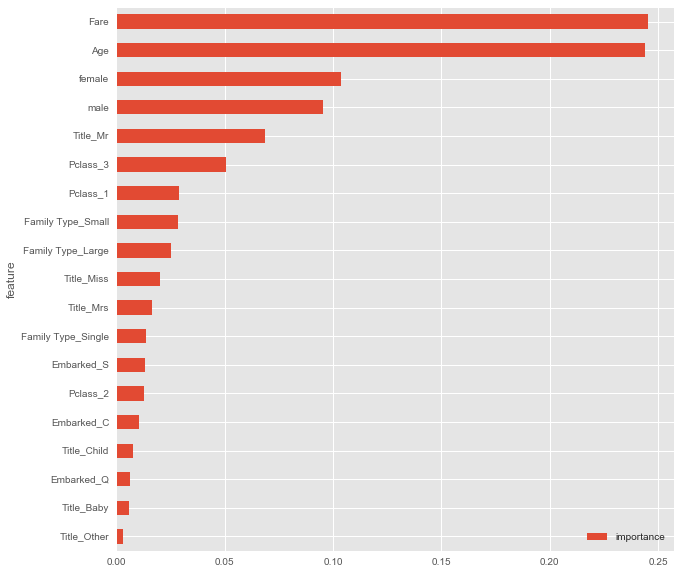

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
clf = clf.fit(X, Y)

features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=Y)


In [127]:
from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
              "max_features": sp_randint(6, 16),
              "min_samples_split": sp_randint(3, 10),
              "min_samples_leaf": sp_randint(2, 10),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(50, 200),
              "max_depth" : sp_randint(6, 11)
             }

clf = RandomForestClassifier()
n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_RFC = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_RFC.fit(X_train, Y_train)







RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30F2668>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30808D0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30F2...CE3025400>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE3025DA0>},
          pre_dispatch='2*n_jobs', rand

In [128]:
random_search_RFC.best_score_

0.85252808988764039

In [129]:

print('Best parameters: {}'.format(random_search_RFC.best_params_))

Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 59}


In [130]:
Y_pred = random_search_RFC.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8044692737430168

In [131]:
#Training the model on complete data
random_search_RFC.fit(X, Y)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30F2668>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30808D0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30F2...CE3025400>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE3025DA0>},
          pre_dispatch='2*n_jobs', rand

In [132]:
Y_Predicting_RandomForest = random_search_RFC.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting_RandomForest
Move.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [133]:
file_name=r'C:\Users\HP\Desktop\Titanic\Random_Forest_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [65]:
import joblib
#Save model for future use
#joblib.dump(random_search_RFC, 'random_search_RFC.pkl')
# To load:
random_search_RFC = joblib.load('random_search_RFC.pkl')

In [190]:
from sklearn.ensemble import BaggingClassifier

random_search_BGC=BaggingClassifier()

param_dist = {
              "max_features": sp_randint(6,16),
              "bootstrap": [True, False],              
              "n_estimators": sp_randint(50, 200),
              "max_samples" : [.8,.9,1.0,.7]
             }




n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_BGC = RandomizedSearchCV(random_search_BGC, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_BGC.fit(X_train, Y_train)





RandomizedSearchCV(cv=7, error_score='raise',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE9EA4DD8>, 'bootstrap': [True, False], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE9EA4D68>, 'max_samples': [0.8, 0.9, 1, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [191]:
random_search_BGC.best_score_

0.848314606741573

In [192]:
print('Best parameters: {}'.format(random_search_BGC.best_params_))

Best parameters: {'bootstrap': True, 'max_features': 14, 'max_samples': 0.9, 'n_estimators': 184}


In [194]:
#Training the model on complete data
random_search_BGC.fit(X, Y)

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE9EA4DD8>, 'bootstrap': [True, False], 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE9EA4D68>, 'max_samples': [0.8, 0.9, 1, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [196]:
Y_Predicting = random_search_BGC.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting
Move.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [197]:
file_name=r'C:\Users\HP\Desktop\Titanic\Bagging_Random Forest_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [66]:
import joblib
#Save model for future use
#joblib.dump(random_search_BGC, 'random_search_BGC.pkl')
# To load: 
random_search_BGC = joblib.load('random_search_BGC.pkl')

In [140]:
from sklearn.ensemble import AdaBoostClassifier


random_search_ADA=AdaBoostClassifier()

param_dist = {
                            
              "n_estimators": sp_randint(50, 1000),
              "learning_rate":[.1,.2,.3,.4,.5,.6,.7,.8],               
              'algorithm' : ['SAMME', 'SAMME.R']
             }




n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_ADA = RandomizedSearchCV(random_search_ADA, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_ADA.fit(X_train, Y_train)




RandomizedSearchCV(cv=7, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE1FBF320>, 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'algorithm': ['SAMME', 'SAMME.R']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [141]:
random_search_ADA.best_score_

0.8258426966292135

In [142]:
print(random_search_ADA.fit(X, Y))

Y_Predicting_ADA = random_search_ADA.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting_ADA

file_name=r'C:\Users\HP\Desktop\Titanic\Adaboost_DT_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

RandomizedSearchCV(cv=7, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE1FBF320>, 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 'algorithm': ['SAMME', 'SAMME.R']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)


In [67]:
import joblib
#Save model for future use
#joblib.dump(random_search_ADA, 'random_search_ADA.pkl')
# To load: 
random_search_ADA = joblib.load('random_search_ADA.pkl')

In [145]:
random_search_ADA.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.7, 'n_estimators': 711}

In [146]:
from sklearn.calibration import CalibratedClassifierCV

clf_isotonic = CalibratedClassifierCV(random_search_RFC, cv=7, method='isotonic')
clf_isotonic.fit(X, Y)


CalibratedClassifierCV(base_estimator=RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ..._jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0),
            cv=7, method='isotonic')

In [147]:
Y_pred = clf_isotonic.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.88268156424581001

In [148]:
Y_Predicting = clf_isotonic.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\Isotonic_RF_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [68]:
import joblib
#Save model for future use
#joblib.dump(clf_isotonic, 'clf_isotonic.pkl')
# To load:
clf_isotonic = joblib.load('clf_isotonic.pkl')

In [149]:
clf_sigmoid = CalibratedClassifierCV(random_search_RFC, cv=7, method='sigmoid')
clf_sigmoid.fit(X, Y)

CalibratedClassifierCV(base_estimator=RandomizedSearchCV(cv=7, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ..._jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0),
            cv=7, method='sigmoid')

In [150]:
Y_pred = clf_sigmoid.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.86033519553072624

In [151]:
Y_Predicting = clf_sigmoid.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\Sigmoid_RF_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [69]:
import joblib
#Save model for future use
#joblib.dump(clf_sigmoid, 'clf_sigmoid.pkl')
# To load: 
clf_sigmoid = joblib.load('clf_sigmoid.pkl')

In [152]:
from sklearn.neighbors import KNeighborsClassifier


random_search_KNN=KNeighborsClassifier()

param_dist = {
                            
              "n_neighbors": sp_randint(5, 50),
              "leaf_size":sp_randint(25,60) ,           
              "p":[1,2]
             }




n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_KNN = RandomizedSearchCV(random_search_KNN, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_KNN.fit(X, Y)


RandomizedSearchCV(cv=7, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE32F31D0>, 'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE32F3EB8>, 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [153]:
Y_Predicting = random_search_KNN.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\KNN_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [70]:
import joblib
#Save model for future use
#joblib.dump(random_search_KNN, 'random_search_KNN.pkl')
# To load: 
random_search_KNN = joblib.load('random_search_KNN.pkl')

In [154]:
from sklearn.svm import SVC

random_search_SVC=SVC(C=17,degree=16,gamma=.05,kernel='rbf')

random_search_SVC.fit(X, Y)

if(0):
    
    param_dist = {

                  "C": sp_randint(1, 20),
                  "gamma":[0.001, 0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5, 1.0] ,
                  "kernel":['poly','rbf','sigmoid'],
                  "degree":sp_randint(3, 20)
                 }




    n_iter_search = 20
    cross_validation = StratifiedKFold(Y_train)

    random_search_SVC = RandomizedSearchCV(random_search_SVC, param_distributions=param_dist,
                                       n_iter=n_iter_search,cv=7)


    random_search_SVC.fit(X, Y)


In [ ]:
#random_search_SVC.best_params_

In [155]:
Y_pred = random_search_SVC.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.83798882681564246

In [156]:
random_search_SVC.fit(X, Y)

SVC(C=17, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=16, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
Y_Predicting = random_search_SVC.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\SVC_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [71]:
import joblib
#Save model for future use
#joblib.dump(random_search_SVC, 'random_search_SVC.pkl')
# To load: 
random_search_SVC = joblib.load('random_search_SVC.pkl')

In [158]:
from sklearn.neural_network import MLPClassifier

random_search_MLP=MLPClassifier()    
param_dist = {

              "hidden_layer_sizes": sp_randint(100,1000),
              "activation":['identity', 'logistic', 'tanh', 'relu'] ,
              "solver":['lbfgs', 'sgd', 'adam'],
              "alpha":[0.001, 0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5] ,
              "learning_rate":['constant', 'invscaling', 'adaptive'],
              "warm_start" : [False,True]
             }




n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_MLP = RandomizedSearchCV(random_search_MLP, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_MLP.fit(X_train, Y_train)




RandomizedSearchCV(cv=7, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE32F6A58>, 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'warm_start': [False, True]},
          pre_dispatch='2*n_jobs', random_state=None, refit=

In [159]:
random_search_MLP.best_params_

{'activation': 'logistic',
 'alpha': 0.03,
 'hidden_layer_sizes': 586,
 'learning_rate': 'adaptive',
 'solver': 'lbfgs',
 'warm_start': True}

In [162]:
Y_pred = random_search_MLP.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8044692737430168

In [163]:
random_search_MLP.fit(X, Y)

Y_Predicting = random_search_MLP.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\MLP_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [72]:
import joblib
#Save model for future use
#joblib.dump(random_search_MLP, 'random_search_MLP.pkl')
# To load: 
random_search_MLP = joblib.load('random_search_MLP.pkl')

In [199]:
from xgboost import plot_importance
from xgboost import XGBClassifier 
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, Y_train)
dFull_train = xgb.DMatrix(X, Y)
dtest = xgb.DMatrix(X_test, Y_test)
test = xgb.DMatrix(test,None)

params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':1,
    'eta':1
}


modelxgb = xgb.train(dict(params, silent=0), dtrain, num_boost_round=100)



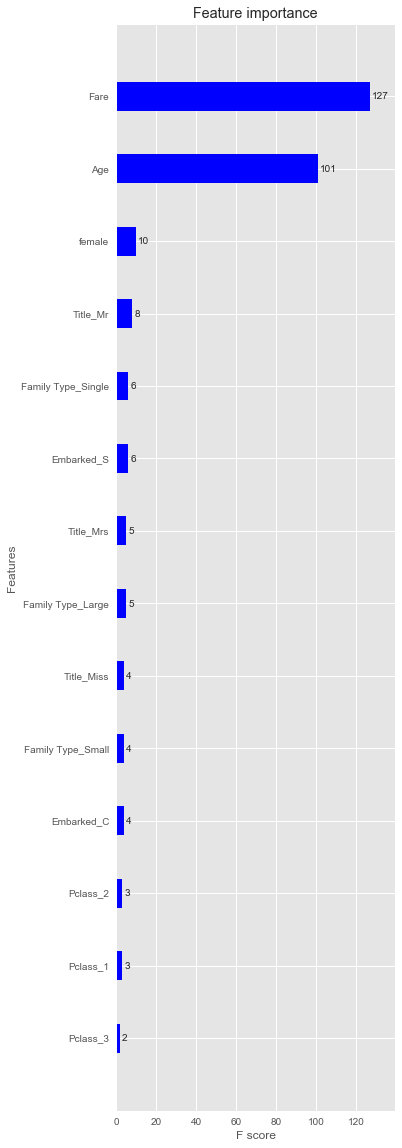

In [166]:
# plot the important features #
fig, ax = plt.subplots(1,1,figsize=(5,20))
#xgb.plot_importance(model,  max_num_features=None)
#xgb.plot_importance(model, ax=ax, height=0.8, ylim=(200.5,277))
xgb.plot_importance(modelxgb, ax=ax, height=0.4,color='blue')


In [200]:
Y_pred = modelxgb.predict(dtest)

Y_pred=(Y_pred>.5).astype(int)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.83240223463687146

In [13]:
modelxgb = xgb.train(dict(params, silent=0), dFull_train, num_boost_round=100)

Y_Predicting = modelxgb.predict(test)
Y_Predicting=(Y_Predicting>.5).astype(int)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\XGB_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

NameError: name 'xgb' is not defined

In [73]:
import joblib
#Save model for future use
#joblib.dump(modelxgb, 'modelxgb.pkl')
# To load:
modelxgb = joblib.load('modelxgb.pkl')

In [110]:
import scipy.stats as st
from xgboost import XGBClassifier 

random_search_XGB = XGBClassifier()
print(random_search_XGB.get_params().keys())
param_dist = {
              
              'learning_rate': st.uniform(0.05, 0.4), #so called `eta` value
              'max_depth': sp_randint(3,1000),
              #'min_child_weight': [11],              
              #'subsample': [0.8],
              'colsample_bytree': st.uniform(.1,.9),
              'colsample_bylevel': st.uniform(.1,.9),
              "n_estimators": st.randint(3,1000),        
                          
              "gamma": st.expon(0, 10),
              "min_child_weight":st.expon(0, 50),
              "subsample": st.beta(10, 1) ,
              "colsample_bytree":st.beta(10, 1),
              'reg_alpha':st.expon(0, 50)
             }




n_iter_search = 20
cross_validation = StratifiedKFold(Y_train)

random_search_XGB = RandomizedSearchCV(random_search_XGB, param_distributions=param_dist,
                                   n_iter=n_iter_search,cv=7)


random_search_XGB.fit(X_train, Y_train)

dict_keys(['base_score', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'nthread', 'objective', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])


RandomizedSearchCV(cv=7, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30AE2E8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30AE978>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE30D8F60>, '...CE31196D8>, 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BCE3119390>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [116]:
Y_pred = random_search_XGB.predict(X_test)

#Y_pred=(Y_pred>.5).astype(int)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.82122905027932958

In [112]:
random_search_XGB.best_params_

{'colsample_bylevel': 0.75526563902651445,
 'colsample_bytree': 0.80167962491849365,
 'gamma': 3.9062218508359852,
 'learning_rate': 0.20731713769221977,
 'max_depth': 416,
 'min_child_weight': 3.2296398137469233,
 'n_estimators': 147,
 'reg_alpha': 4.9936313554123721,
 'subsample': 0.85602924128005875}

In [117]:
#random_search_XGB.fit(X, Y)

Y_Predicting = random_search_XGB.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\Sklearn_XGB_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [74]:
import joblib
#Save model for future use
#joblib.dump(random_search_XGB, 'random_search_XGB.pkl')
# To load:
random_search_XGB = joblib.load('random_search_XGB.pkl')

In [85]:
from sklearn.ensemble import VotingClassifier


 
    
Ensem_Class1 = VotingClassifier(estimators=[ ('Random Forest', random_search_RFC), ('Bagging', random_search_BGC),
('Adaboost', random_search_ADA),('Calibrated Isotonic',clf_isotonic),('Calibrated Sigmoid',clf_sigmoid),
('KNN',random_search_KNN),('SVC',random_search_SVC),('XGB',random_search_XGB)],
       voting='hard')  
       
Ensem_Class1=Ensem_Class1.fit(X_train,Y_train)       
       
       
       

    

In [86]:
Y_Predicting = Ensem_Class1.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\Ensem_Class1_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [76]:
import joblib
#Save model for future use
#joblib.dump(Ensem_Class1, 'Ensem_Class1.pkl')
# To load:
Ensem_Class1 = joblib.load('Ensem_Class1.pkl')

In [83]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

Stck_model = StackingClassifier(classifiers=[ random_search_BGC, random_search_ADA,clf_sigmoid,random_search_KNN,
       random_search_SVC,random_search_XGB,Ensem_Class1,clf_isotonic], 
                          meta_classifier=RandomForestClassifier()
                               )
scores = model_selection.cross_val_score(Stck_model, X, Y, 
                                              cv=7, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) " 
          % (scores.mean(), scores.std()))



KeyboardInterrupt: 

In [ ]:
Y_Predicting = Stck_model.predict(test)
Move = pd.DataFrame()
Move['PassengerId']=ID
Move['Survived']=Y_Predicting

file_name=r'C:\Users\HP\Desktop\Titanic\StackedModek_Submission.csv'
Move.to_csv(file_name, sep=',', encoding='utf-8',index=False,columns=['PassengerId','Survived'])

In [ ]:
import joblib
#Save model for future use
joblib.dump(Stck_model, 'Stck_model.pkl')
# To load:
#Stck_model = joblib.load('Stck_model.pkl')